# Imports

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle
import random
import warnings

#Read in CSV

In [2]:
df = pd.read_csv("songs_normalize.csv")
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


#Dataset Exploration

##Describe the Dataset

In [3]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


##Display Dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


##Check for NA values

In [5]:
num_nan = df.isna().sum().sum()
print(num_nan)

0


##Check for unique genres and genre counts

In [6]:
unique = df['genre'].unique()
unique.sort()
print(unique)
print(df['genre'].value_counts())
print(df['artist'].value_counts())

['Dance/Electronic' 'Folk/Acoustic, pop' 'Folk/Acoustic, rock'
 'Folk/Acoustic, rock, pop' 'R&B' 'World/Traditional, Folk/Acoustic'
 'World/Traditional, hip hop' 'World/Traditional, pop'
 'World/Traditional, pop, Folk/Acoustic' 'World/Traditional, rock'
 'World/Traditional, rock, pop' 'country' 'country, latin'
 'easy listening' 'hip hop' 'hip hop, Dance/Electronic' 'hip hop, R&B'
 'hip hop, country' 'hip hop, latin, Dance/Electronic' 'hip hop, pop'
 'hip hop, pop, Dance/Electronic' 'hip hop, pop, R&B'
 'hip hop, pop, R&B, Dance/Electronic' 'hip hop, pop, R&B, latin'
 'hip hop, pop, country' 'hip hop, pop, latin' 'hip hop, pop, rock'
 'hip hop, rock, pop' 'latin' 'metal' 'pop' 'pop, Dance/Electronic'
 'pop, Folk/Acoustic' 'pop, R&B' 'pop, R&B, Dance/Electronic'
 'pop, R&B, easy listening' 'pop, country'
 'pop, easy listening, Dance/Electronic' 'pop, easy listening, jazz'
 'pop, latin' 'pop, rock' 'pop, rock, Dance/Electronic'
 'pop, rock, Folk/Acoustic' 'pop, rock, metal' 'rock'
 'rock

#Graphs

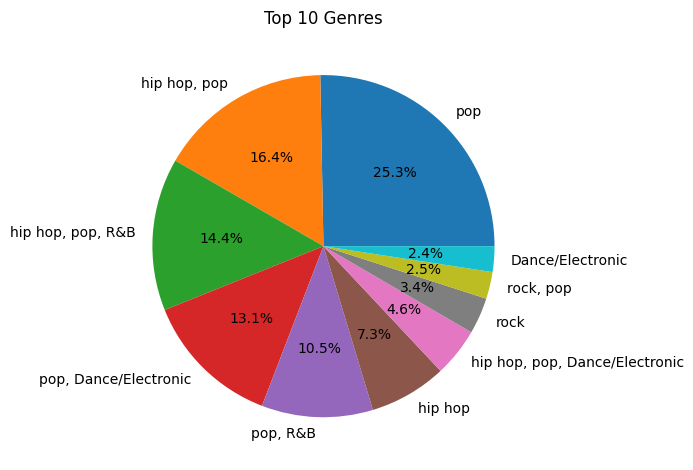

In [7]:
fig, ax = plt.subplots()
ax.pie(df['genre'].value_counts().head(10), labels = df['genre'].value_counts().head(10).index, autopct='%1.1f%%')
ax.set(ylabel='', title='Top 10 Genres', aspect='equal')
    
fig.tight_layout()

Text(0.5, 1.0, 'Distribution for Danceability and Speechiness')

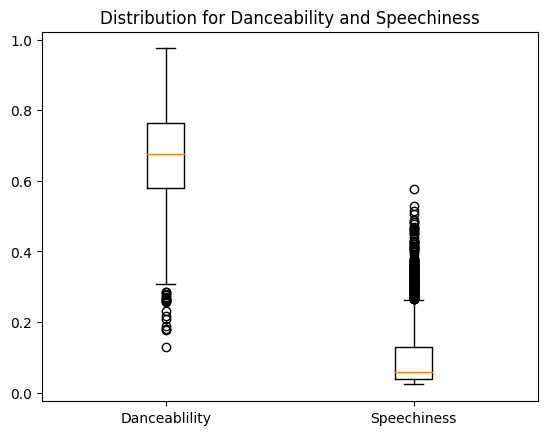

In [8]:
plt.boxplot([df['danceability'], df['speechiness']], labels=['Danceablility', 'Speechiness'])
plt.title('Distribution for Danceability and Speechiness')

Text(0.5, 1.0, 'Top 20 Artist Song Counts')

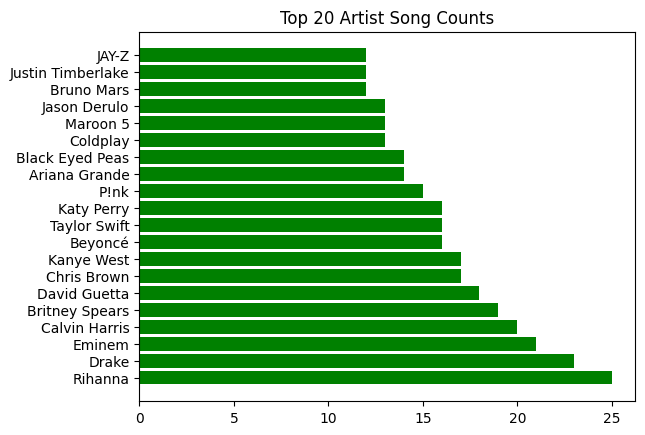

In [9]:
plt.barh(df['artist'].value_counts().head(20).index, df['artist'].value_counts().head(20), color= 'green')
plt.title('Top 20 Artist Song Counts')

Text(0.5, 1.0, 'Artist Song Distribution')

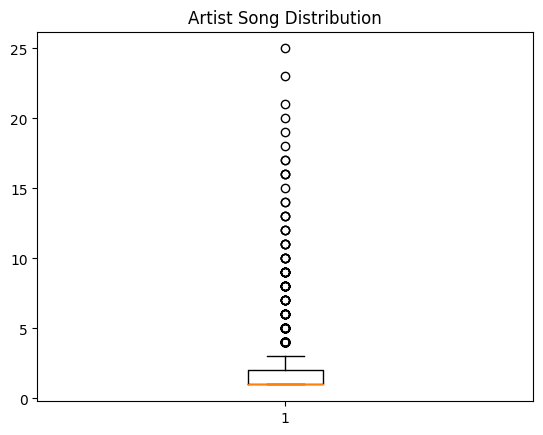

In [10]:
plt.boxplot(df['artist'].value_counts())
plt.title('Artist Song Distribution')

There is too much of a 1 to 1 correlation between the artists and the songs. It is too high of a correlation for training.

#Feature Engineering

##Create labels for genres that are hip hop

In [11]:
df['labels'] = df['genre'].str.contains('hip hop') == True

###Show a valid distribution of entries for the labels

In [12]:
df['labels'].value_counts()

False    1222
True      778
Name: labels, dtype: int64

##Drop the Genre column

In [13]:
df = df.drop('genre', axis = 1)

##Encode strings and Drop irrelevant columns

In [14]:
encoder = LabelEncoder()
df = df.drop(['artist'], axis=1)

df['explicit'] = encoder.fit_transform(df['explicit'])
df['labels'] = encoder.fit_transform(df['labels'])

df = df.drop(['song'], axis=1)

df

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,labels
0,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,0
1,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,0
2,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,0
3,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,0
4,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,0,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,0
1996,178426,0,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,0
1997,200593,0,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,1
1998,171029,0,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,0


##show correlation between features and labels
this checks to see if we need to drop any other features that are highly correlated

In [15]:
df.corr()

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,labels
duration_ms,1.000000,0.123595,-0.316534,0.050617,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603,0.109627
explicit,0.123595,1.000000,0.078477,0.046605,0.248845,-0.162462,0.003320,-0.089829,0.049576,0.417343,-0.033523,-0.082522,0.008884,-0.045455,0.013221,0.488183
year,-0.316534,0.078477,1.000000,-0.003825,0.033532,-0.108644,0.007380,0.017479,-0.007358,0.001111,0.033809,-0.050265,-0.027037,-0.209365,0.076867,0.025851
popularity,0.050617,0.046605,-0.003825,1.000000,-0.003546,-0.014021,0.014823,0.030632,-0.021353,0.021162,0.024619,-0.048059,-0.009856,-0.016142,0.014288,0.079104
danceability,-0.060057,0.248845,0.033532,-0.003546,1.000000,-0.104038,0.032731,-0.033315,-0.067528,0.145590,-0.065429,0.023207,-0.126413,0.403178,-0.173418,0.287800
energy,-0.078763,-0.162462,-0.108644,-0.014021,-0.104038,1.000000,-0.003446,0.651016,-0.040651,-0.057018,-0.445469,0.037861,0.156761,0.334474,0.153719,-0.112110
key,-0.002560,0.003320,0.007380,0.014823,0.032731,-0.003446,1.000000,-0.007474,-0.153182,0.007147,0.002365,-0.008173,-0.033071,0.036977,-0.001431,0.050771
loudness,-0.079912,-0.089829,0.017479,0.030632,-0.033315,0.651016,-0.007474,1.000000,-0.028133,-0.076388,-0.310039,-0.104925,0.102159,0.232150,0.080709,-0.035590
mode,-0.003848,0.049576,-0.007358,-0.021353,-0.067528,-0.040651,-0.153182,-0.028133,1.000000,-0.000077,0.005744,-0.038613,0.025439,-0.074681,0.048434,-0.017789
speechiness,0.066998,0.417343,0.001111,0.021162,0.145590,-0.057018,0.007147,-0.076388,-0.000077,1.000000,0.000394,-0.062954,0.061172,0.073605,0.057747,0.400866


#Model building

##Create labels and features variables

In [16]:
labels = df['labels']
labels.values.ravel()
features = df.drop('labels', axis = 1)

print(labels)
print('features shape:', features.shape)
print('length of labels:', len(labels))
print('head of features:', features.head())

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    1
1998    0
1999    1
Name: labels, Length: 2000, dtype: int64
features shape: (2000, 15)
length of labels: 2000
head of features:    duration_ms  explicit  year  popularity  danceability  energy  key  \
0       211160         0  2000          77         0.751   0.834    1   
1       167066         0  1999          79         0.434   0.897    0   
2       250546         0  1999          66         0.529   0.496    7   
3       224493         0  2000          78         0.551   0.913    0   
4       200560         0  2000          65         0.614   0.928    8   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -5.444     0       0.0437        0.3000          0.000018    0.3550   
1    -4.918     1       0.0488        0.0103          0.000000    0.6120   
2    -9.007     1       0.0290        0.1730          0.000000    0.2510   
3    -4.063     0       0.0466        

Confusion Matrix:
 [[1098  351]
 [ 124  427]]

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      1449
           1       0.55      0.77      0.64       551

    accuracy                           0.76      2000
   macro avg       0.72      0.77      0.73      2000
weighted avg       0.80      0.76      0.77      2000



Text(0.5, 1.0, 'Confusion Matrix - Explict vs Hip Hop')

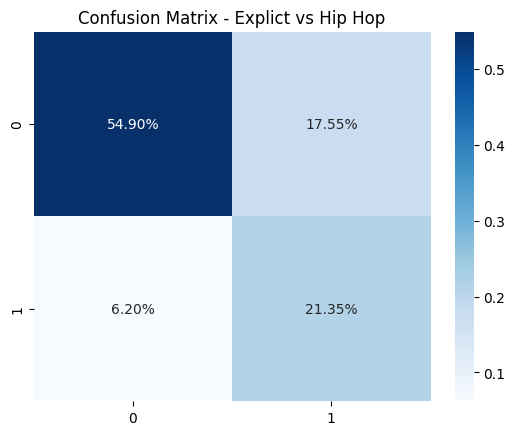

In [17]:
cm = confusion_matrix(df['explicit'], df['labels'])
print('Confusion Matrix:\n', cm)
print()
print('Classification report:\n', classification_report(df['explicit'],df['labels'] ))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix - Explict vs Hip Hop')

##Decision tree

In [18]:
#create train test split
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(features, labels, test_size=0.20, random_state=100)

print('records in training set:', len(x_train))
print('records in test set:', len(x_test))

clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('accuracy of the sklearn DecisionTreeClassifier:', accuracy_score(y_test, y_pred))

records in training set: 1600
records in test set: 400
accuracy of the sklearn DecisionTreeClassifier: 0.705


In [19]:
#check other types of decision trees criteria
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=3)
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('accuracy of the sklearn DecisionTreeClassifier with criterion=gini, max_depth=3, min_samples_split=3:', accuracy_score(y_test, y_pred))

clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_impurity_decrease=.07)
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('accuracy of the sklearn DecisionTreeClassifier with criterion=entropy, max_depth=2, min_impurity_decrease=.07:', accuracy_score(y_test, y_pred))


clf = DecisionTreeClassifier(criterion='gini', splitter='random')
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('accuracy of the sklearn DecisionTreeClassifier with criterion=gini, splitter=random:', accuracy_score(y_test, y_pred))

accuracy of the sklearn DecisionTreeClassifier with criterion=gini, max_depth=3, min_samples_split=3: 0.7225
accuracy of the sklearn DecisionTreeClassifier with criterion=entropy, max_depth=2, min_impurity_decrease=.07: 0.7625
accuracy of the sklearn DecisionTreeClassifier with criterion=gini, splitter=random: 0.7025


In [20]:
#run cross validation on the decision tree 

clf = DecisionTreeClassifier(criterion='entropy')

cross_val = cross_val_score(clf, features, labels, cv=10)

print('generalization accuracy of the model:', np.average(cross_val))

generalization accuracy of the model: 0.71


In [21]:
#grid search on different parameters
clf = DecisionTreeClassifier(criterion='entropy')
params = {"max_depth": [5,10,15,20]  , 
         "min_samples_leaf": [5,10,15,20],
         "max_features": [5,10,15]}
grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')
grid_search.fit(features, labels)

print('best value for each of the tested parameters:', grid_search.best_params_)
print('accuracy of the model with these best values:', grid_search.best_score_)

best value for each of the tested parameters: {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 10}
accuracy of the model with these best values: 0.757


In [22]:
# nested cross valdation across the different parameters
clf = DecisionTreeClassifier(criterion='entropy')
params = {"max_depth": [5,10,15,20]  , 
         "min_samples_leaf": [5,10,15,20],
         "max_features": [5,10,15]}
grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')

nested_cross_val = cross_val_score(grid_search, features, labels, cv=5)
print("Accuracy:", nested_cross_val.mean())

Accuracy: 0.7344999999999999


In [23]:
#store accuracy metrics
accuracy_list = []
accuracy_list.append(nested_cross_val.mean())

##Naive Bayes

In [24]:
#simple NB classifier cross validation

clf = GaussianNB()
cv = cross_val_score(clf, features, labels, cv = 10)

print('Accuracy:', cv.mean())

Accuracy: 0.65


In [25]:
accuracy_list.append(cv.mean())

In [26]:
#Simple NB classifier with the cross validation preditions matrix and classification report
clf = GaussianNB()

predictions = cross_val_predict(clf, features, labels)

print('confusion matrix:\n', confusion_matrix(labels, predictions))

print('classification report:\n', classification_report(labels, predictions))

confusion matrix:
 [[1128   94]
 [ 631  147]]
classification report:
               precision    recall  f1-score   support

           0       0.64      0.92      0.76      1222
           1       0.61      0.19      0.29       778

    accuracy                           0.64      2000
   macro avg       0.63      0.56      0.52      2000
weighted avg       0.63      0.64      0.57      2000



###ROC

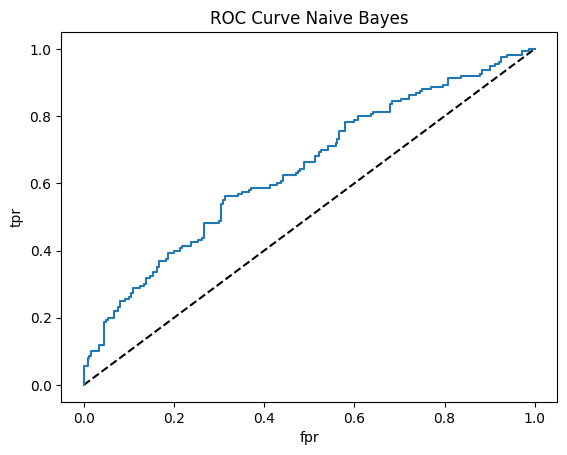

AUC: 0.64234375


In [27]:
#train test split
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(features, labels, test_size=0.20, random_state=100)

#model
clf = GaussianNB()
clf = clf.fit(x_train, y_train)

#predicted values
pred = clf.predict_proba(x_test)

#values for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred[:,1])


plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

print('AUC:', roc_auc_score(y_test, pred[:,1]))

##KNN

In [28]:
#establish components of pipe
ss = StandardScaler()

pca = PCA()

clf = KNeighborsClassifier(n_neighbors=7)

#pipeline with elements for the cross validation
pipe = Pipeline(steps = [('scaler', ss), ('pca', pca), ('knn', clf)])

#cross validation with pipeline process running each time
cv = cross_val_score(pipe, features, labels)

print('accuracy:', cv.mean())

accuracy: 0.7494999999999999


In [29]:
#parameter grid for the parameters to grid search
param_grid = {
    'pca__n_components': list(range(1, 16)),
    'knn__n_neighbors': list(range(1, 25))
}

#grid search to pass pipeline
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search = grid_search.fit(features, labels)
print('the best number of dimensions and best number of neighbors for this dataset:', grid_search.best_params_)
print('the accuracy when using this best number of dimensions and neighbors:', grid_search.best_score_)

the best number of dimensions and best number of neighbors for this dataset: {'knn__n_neighbors': 22, 'pca__n_components': 6}
the accuracy when using this best number of dimensions and neighbors: 0.7745


In [30]:
#nested cross validation passing grid search
nested_cross_val = cross_val_score(grid_search, features, labels, cv=5)
print("Accuracy:", nested_cross_val.mean())

Accuracy: 0.765


In [31]:
accuracy_list.append(nested_cross_val.mean())
print(accuracy_list)

[0.7344999999999999, 0.65, 0.765]


##SVM

In [32]:
#create SVM pipeline
pipe = Pipeline(steps=[('scaling', ss), ('pca', pca), ('svm', SVC())])
#parameter grid for the parameters to grid search
param_grid = {
    'pca__n_components': list(range(1, 16)),
    'svm__kernel': ['linear', 'rbf', 'poly']
}
grid_search = GridSearchCV(pipe, param_grid, cv=5)
#run nested cross validation to find best cross validation predictions
nested_cross_pred = cross_val_predict(grid_search, features, labels, cv=5)

print('accuracy:', accuracy_score(labels, nested_cross_pred))
print('classification report', classification_report(labels, nested_cross_pred))

accuracy: 0.769
classification report               precision    recall  f1-score   support

           0       0.77      0.90      0.83      1222
           1       0.78      0.57      0.66       778

    accuracy                           0.77      2000
   macro avg       0.77      0.73      0.74      2000
weighted avg       0.77      0.77      0.76      2000



In [33]:
accuracy_list.append(accuracy_score(labels, nested_cross_pred))
print(accuracy_list)

[0.7344999999999999, 0.65, 0.765, 0.769]


##Neural Network

In [34]:
# create NN pipeline
NN = MLPClassifier()

ss = StandardScaler()

pipe = Pipeline(steps = [('scaler', ss), ('NN', NN)])

#parameter grid for the parameters to grid search
param_grid = {
    'NN__hidden_layer_sizes': [(30,), (40,), (50,), (60,)],
    'NN__activation': ['logistic', 'tanh', 'relu']
}


grid_search = GridSearchCV(pipe, param_grid, cv=5)

#run nested cross validation
nested_cross_val = cross_val_score(grid_search, features, labels, cv=5)

print("Accuracy:", nested_cross_val.mean())

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

Accuracy: 0.7575


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
accuracy_list.append(nested_cross_val.mean())
print(accuracy_list)

[0.7344999999999999, 0.65, 0.765, 0.769, 0.7575]


##Random Forest Ensemble

In [36]:
rfc = RandomForestClassifier()
#parameter grid for the parameters to grid search
param_grid = {
    'n_estimators': [50, 100, 150]
}

grid_search = GridSearchCV(rfc, param_grid, cv=5)
#get the nested cross validation predictions and scores
nested_cross_val = cross_val_score(grid_search, features, labels, cv=5)
nested_cross_pred = cross_val_predict(grid_search, features, labels, cv=5)

In [37]:
print("Accuracy:", nested_cross_val.mean())
print('Accuracy:', accuracy_score(labels, nested_cross_pred))
print('----'*20)
print('classification report\n', classification_report(labels, nested_cross_pred))

Accuracy: 0.78
Accuracy: 0.785
--------------------------------------------------------------------------------
classification report
               precision    recall  f1-score   support

           0       0.79      0.88      0.83      1222
           1       0.78      0.63      0.69       778

    accuracy                           0.79      2000
   macro avg       0.78      0.76      0.76      2000
weighted avg       0.78      0.79      0.78      2000



In [38]:
accuracy_list.append(nested_cross_val.mean())
print(accuracy_list)

[0.7344999999999999, 0.65, 0.765, 0.769, 0.7575, 0.78]


##AdaBoost

In [39]:
clf = AdaBoostClassifier()
#parameter grid for the parameters to grid search
param_grid = {
    'n_estimators': [50, 100, 150]
}

grid_search = GridSearchCV(clf, param_grid, cv=5)
#get the nested cross validation predictions and scores
nested_cross_val = cross_val_score(grid_search, features, labels, cv=5)
nested_cross_pred = cross_val_predict(grid_search, features, labels, cv=5)

In [40]:
print("Accuracy:", nested_cross_val.mean())
print('Accuracy:', accuracy_score(labels, nested_cross_pred))
print('----'*20)
print('classification report\n', classification_report(labels, nested_cross_pred))

Accuracy: 0.7185
Accuracy: 0.7185
--------------------------------------------------------------------------------
classification report
               precision    recall  f1-score   support

           0       0.76      0.80      0.78      1222
           1       0.65      0.60      0.62       778

    accuracy                           0.72      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.72      0.72      0.72      2000



In [41]:
accuracy_list.append(nested_cross_val.mean())
print(accuracy_list)

[0.7344999999999999, 0.65, 0.765, 0.769, 0.7575, 0.78, 0.7185]


#Create Final Model

##Plot Model Accuracies

<BarContainer object of 7 artists>

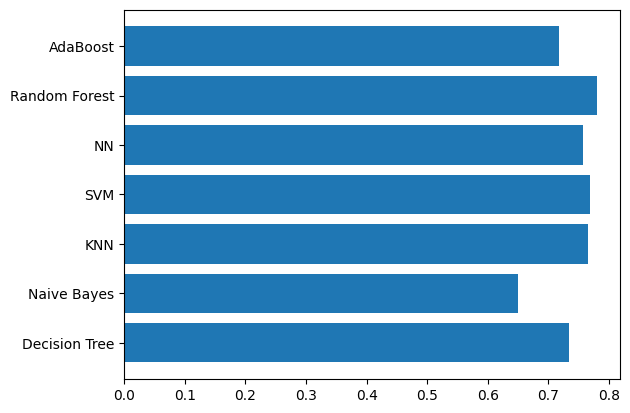

In [42]:
models = ['Decision Tree', 'Naive Bayes', 'KNN', 'SVM', 'NN', 'Random Forest', 'AdaBoost']
plt.barh(models, accuracy_list)

In [43]:
#looking at the above results for each model, we see the highest score
#for accuracy when running nested cross validation to tune the hyperparameters comes from
#random forest, therefore our final model will be a random forest model since classifying 
#a song as hip hop or not does not need to consider recall or precision due to no outstanding
#ramifications for each category

In [44]:
rfc = RandomForestClassifier(random_state=150)
#parameter grid for the parameters to grid search
param_grid = {
    'n_estimators': [50, 100, 150]
}



final_clf = GridSearchCV(rfc, param_grid, cv=5, refit=False)
final_clf.fit(features, labels)

print('best value for each of the tested parameters:', final_clf.best_params_)
print('accuracy of the model with these best values:', final_clf.best_score_)

best value for each of the tested parameters: {'n_estimators': 100}
accuracy of the model with these best values: 0.7865


In [45]:
#replace this final_model with your final model
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(features, labels, test_size=.2, random_state=150)
final_model = RandomForestClassifier(n_estimators=100, random_state=150)
final_model.fit(X_train, Y_train)

filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [46]:
#test the model
warnings.filterwarnings("ignore")

#See how many it takes to misclassify just for fun
for i in range(0, 2000):
  record = features.iloc[[i]]
  label = labels[i]


  mod_record = np.array(record).reshape(1,-1)

  # load the model from disk
  loaded_model = pickle.load(open(filename, 'rb'))

  y_pred = loaded_model.predict(mod_record)
  if (y_pred != label):
    print('took', i)
    break

took 87


In [54]:
#test random entry
random_index = random.randrange(0,2000)
record = features.iloc[[random_index]]
label = labels[random_index]


mod_record = np.array(record).reshape(1,-1)

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

y_pred = loaded_model.predict(mod_record)
print("predicted:")
if y_pred == 1:
  print("Hip Hop")
else:
  print("not Hip Hop")
print("\nactual:")
if label == 1:
  print("Hip Hop")
else:
  print("not Hip Hop")

predicted:
Hip Hop

actual:
Hip Hop


Of the models tested, we chose to use a Random Forest model to predict whether or not a song was in the hip hop genre. This model can be seen working to a reasonable level of accuracy.

We chose to train the models with the features that we did since they were statistically independent from one another and they weren't strongly correlated (almost one-to-one) with the entries. By these standards, we chose to drop the song titles and artist names since there was a unique title per record which would have overshadowed any significant trends in the other features. Similarly there were too many artists for them to be one hot encoded and so in order to keep dimensionality minimized we decided to drop that feature.